# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

### Первичный анализ данных

Перед началом анализа импортируем все необходимые для работы библиотеки и загрузим заданный датафрейм

In [1]:
# импортируем библиотеки для работы с данными, графиками и математическими операторами
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

В связи с тем, что я сделал большую часть проекта в Google Colab, а потом загрузил проект сюда, мне пришлось обновить библиотекe pandas для корректной работы.

In [3]:
# два варианта загрузки датафреймов через связку try-except, 
# в связи с тем, что работал над проектом в среде Colab:
try:
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_05/games.csv')
except:
  df = pd.read_csv('/datasets/games.csv')

Выведем общую информацию, количество пропусков, описание и первые строчки представленной таблицы, а также возможное количество дубликатов.

In [4]:
# воспользуемся функцией автоматизиции вывода первичных данных по заданной таблице
def df_analysis(dataframe):
    """
    На вход функция принимает датафрейм.
    Выводит поэтапно на экран информацию по таблице методом info(),
    10 первых строчек методом head(), описание данных таблицы методом describe(), 
    а также выводит долю пропусков по столбцам с количеством дубликатов по всей таблице.
    """
    display(dataframe.info())
    display(dataframe.head(10))
    display(dataframe.describe())
    print(f'Доля пропусков в таблице {dataframe.isna().mean().apply("{:.2%}".format)}, количество дубликатов {dataframe.duplicated().sum()}')

In [5]:
# с помощью функции df_analysis выведем первичную информацию по заданной таблице
df_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Доля пропусков в таблице Name                0.01%
Platform            0.00%
Year_of_Release     1.61%
Genre               0.01%
NA_sales            0.00%
EU_sales            0.00%
JP_sales            0.00%
Other_sales         0.00%
Critic_Score       51.32%
User_Score         40.09%
Rating             40.48%
dtype: object, количество дубликатов 0


Разберем уникальные значения некоторых столбцов более подробно:

In [6]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Согласно документации таблица имеет следующие столбцы:

* `Name` — название игры
* `Platform` — платформа
*	`Year_of_Release` — год выпуска
*	`Genre` — жанр игры
*	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
*	`EU_sales` — продажи в Европе (миллионы проданных копий)
*	`JP_sales` — продажи в Японии (миллионы проданных копий)
*	`Other_sales` — продажи в других странах (миллионы проданных копий)
*	`Critic_Score` — оценка критиков (максимум 100)
*	`User_Score` — оценка пользователей (максимум 10)
*	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Вывод

В таблице находятся данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) за 2016 год.

В данных обнаржуены следующие проблемы:

* названия всех столбцов написаны с заглавной буквы, необходимо привести к нижнему регистру;
* в столбце `Name` пропущено 0.01% данных;
* столбец `Year_of_Release` имеет тип данных *float*, а содержит в себе год выпуска игры, соотвественно необходимо привести к целочисленному типу данных *int*. Также в столбце пропущено 1.6% данных;
* в столбце `Genre` пропущено 0.01% данных;
* в столбце `Critic_Score` пропущено 51,32% данных;
* столбец `User_Score` имеет строчный тип данных *object*, а содержит информацию о пользовательских оценках, соответственно необходимо привести к типу числа с плавающей точкой *float*. Также в столбце пропущено 40,09% данных;
* в столбце `Rating` пропущено 40,48% данных.

Данных достаточно для анализа, необходимо устранить ошибки и перевести некоторые столбцы к нужному типа данных, а также попытаться объяснить причину появления пропусков и по возможности заполнить их. Дубликаты в данных отсутствуют.

## Подготовка данных

Заменим наименование столбцов (приведем к нижнему регистру), преобразуем данные в нужные типа, проанализируем и заполним пропуски.

Рассчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Переименование столбцов

Приведем названия всех столбцов к нижнему регистру

In [9]:
# приведем названия столбцов к нижнему регистру, используя метод str.lower()
# и перезапишем таблицу
df.columns = df.columns.str.lower()

### Изменение типов данных

Необходимо изменить тип данных у следующих столбцов:

* столбец `year_of_release` тип данных *float* необходимо привести к целочисленному типу данных *int*
* столбец `user_score` строчный тип данных *object* необходимо привести к типу числа с плавающей точкой *float*.

#### Столбец `year_of_release`

Изменим тип данных столбца `year_of_release`

In [10]:
# изменим тип данных year_of_release и перезапишем его
df['year_of_release'] = df['year_of_release'].astype('Int64')

#### Столбец `user_score`

В связи с тем, что в столбце `user_score` имеются строчные значения `tbd`, сразу невозможно изменить тип данных на *float*. 

По информации из Интернета аббревиатура `tbd` от английского *To Be Determined* (будет определено) или *To Be Decided* (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Т.е. по каким-то причинам пользовательский рейтинг игры не был определен. 

Рассчитаем долю значений `tbd` в столбце

In [11]:
# рассчитаем долю значений tbd разделив количество ячеек с этим значением на их общее число
len(df.query('user_score == "tbd"')) / len(df['user_score'])

0.1450194436135208

Доля значенией в столбце составляет 14,5%. Необоснованное изменение `tbd` на числовые значения могут сильно исказить статистический анализ.

Для дальнейшей работы заменим `tbd` на пропуски NaN и изменим тип данных на float. 

In [12]:
# заменим значения tbd на пропуски NaN
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

# изменим тип данных на float
df['user_score'] = df['user_score'].astype('float64')

После этого пересчитаем долю пропусков в данном столбце

In [13]:
# рассчитаем долю пропусков в столбце user_score
df['user_score'].isna().mean()

0.5459168411606342

### Заполнение пропусков

Как уже выяснили в первичном анализе, пропуски имеются в следующих столбцах:

* `name` 0.01% пропусков;
* `year_of_release` 1.6% пропусков;
* `genre` 0.01% пропусков;
* `critic_score` 51.32% пропусков;
* `user_score` 54.59% пропусков;
* `rating` 40.48% пропусков.

#### Столбцы `name` и `genre`

В столбцах незначительное количество пропусков, всего 0.01%, поэтому данные пропуски можно удалить.

In [14]:
# удалим пропуски в столбцах name и genre, перезапишем таблицу и сбросим индексацию
df['name'] = df['name'].dropna()
df['genre'] = df['genre'].dropna()
df = df.reset_index(drop=True)

#### Столбец `year_of_release`

Для замены пропусков в столбце с годом выхода игры, воспользуемся годом выхода этой же игры, только на другой платформе. Возможна ситцация, когда игра на разных платформах выходила в разное время. Но т.к. количество пропусков в таблице всего 1.6%, то это не критично.

In [15]:
# циклом выделим все ячейки с пропусками в столбце year_of_release
# и если есть ячейки с совпадающим названием игры (или игр, если их несколько), 
# то берем максимальный год выхода
for index in df[df['year_of_release'].isna() == True].index:  
    df['year_of_release'][index] = df.loc[df['name'] == df['name'][index],
                                          'year_of_release'].max()

После замены проверим долю пропусков по столбцу

In [16]:
df['year_of_release'].isna().mean()

0.008734669458570146

Оставшихся пропусков очень мало, менее 1%, поэтому их можно удалить.

In [17]:
# удалим оставшиеся пропуски , перезапишем таблицу и сбросим индексацию
df['year_of_release'] = df['year_of_release'].dropna()
df = df.reset_index(drop=True)

#### Столбцы `critic_score`, `user_score`

Пропусков в этих столбцах очень много, но адекватной замены для них нет. Поэтому целесообразно оставить их

#### Столбец `rating`

Пропуски в столбце рейтинг возможны по причине того, что игра не сертифицируется ассоциацией ESRB, но для дальнейшего анализа такие игры тоже необходимы. Соответствено пропуск в этом столбце заменим на значение `no_rating`

In [18]:
# заполним пропуски столбца rating значениями no_rating
df['rating'] = df['rating'].fillna('no_rating')

### Расчет суммарных продаж

Рассчитаем сумму продаж игр по всем регионам NA, EU, JP, а также других и добавим ее в новый столбец `all_sales`

In [19]:
# создадим новый столбец all_sales и добавим в него сумму продаж всех регионов
all_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['all_sales'] = df[all_sales].sum(axis=1)

### Вывод

Мы успешно привели наименования столбцов к нижнему регистру написания, преобразовали необходимые данные в нужные типа и обработали пропуски. Также рассчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Исследовательский анализ данных

### Выпуск игр в разные годы

Рассмотрим выпуск игр в разные годы. Для этого создадим сводную таблицу и построим по ней линейный график.

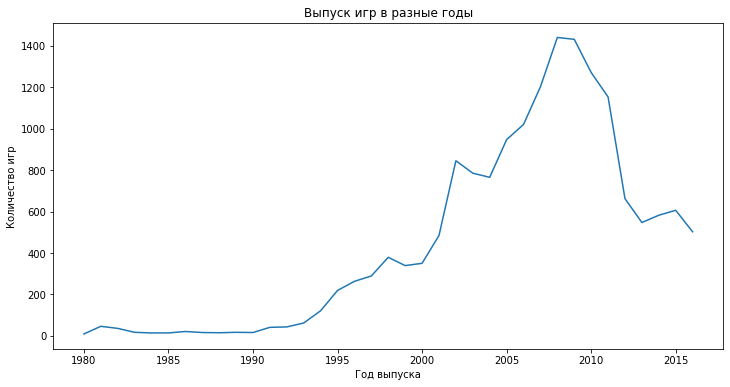

In [20]:
# соберем сводную таблицу по количеству выпускаемых игр в разные годы и 
year_release_pivot = pd.pivot_table(df, index='year_of_release',
                                    values='platform', aggfunc='count')
year_release_pivot.columns = ['release_count']

# по данной сводной таблице построим линейный график
plt.figure(figsize=(12, 6))
#sns.set_theme(style='darkgrid')
sns.lineplot(data=year_release_pivot, x=year_release_pivot.index, 
             y='release_count').set(title='Выпуск игр в разные годы', 
                                    xlabel='Год выпуска', ylabel='Количество игр');

На представленном график мы видим, что происходило с игровыми релизами с 1980 по 2016 года:
* с 1980 по 1992 год крайне редкие выпуски игр, в связи с ограниченными технологиями;
* умеренный рост игровых релизов с 1993 по 2002 года, начало технического прогресса в сфере разработки игры;
* небольшой спад между 2002 и 2005 годами;
* затем бурный рост с 2004 по 2009 года;
* резкий спад с 2009, возможно связан с развитием смартфонов и мобильных игр.

### Изменение продаж по платформам


Рассмотрим продажи игр по разным платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Затем определим характерный срок появления и исчезания игровых платформ.

Для начала составим сводную таблицу по платформам с суммарными продажами и на ее основе выведем столбчатый график популярности платформ.

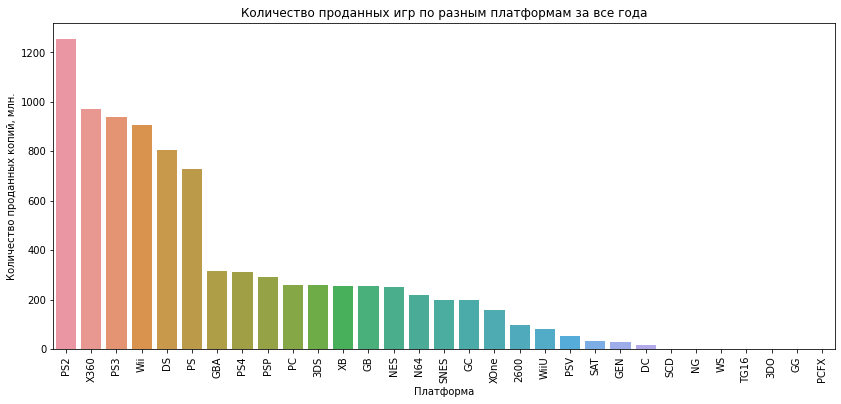

In [21]:
# создадим сводную таблицу по суммарным продажам платформ за все года
# и отсортируем значения по убыванию
platform_pivot = pd.pivot_table(df, index='platform', values='all_sales', 
                                aggfunc='sum').sort_values(by='all_sales', ascending=False)

# построим столбчатый график на основании таблицы
plt.figure(figsize=(14, 6))
#sns.set_theme(style='darkgrid')
sns.barplot(x=platform_pivot.index, y=platform_pivot['all_sales'], 
            data=df).set(title='Количество проданных игр по разным платформам за все года', 
                         xlabel='Платформа', ylabel='Количество проданных копий, млн.')
plt.xticks(rotation=90);

Как видно из графика, лидирующими по глобальным продажам платформами являются **PlayStation 2, XBox 360, Nintendo Wii, PlayStation 3, Nintendo DS, PlayStation One**.

Выделим лидеров в сводную таблицу и построим распределение продаж по годам.

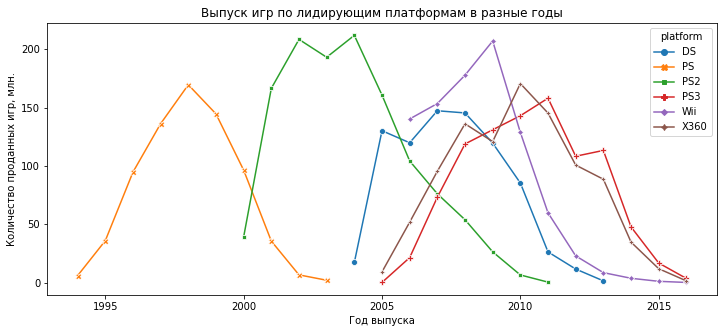

In [22]:
# создадим сводную таблицу с данными продаж по годам и лидирующим платформам
# ограничим выборку 1990 годом, т.к. ранее присутствуют аномальные данные о продажах Nintendo DS в 1985 году
platform_year_pivot = pd.pivot_table(df, 
                                     index=['platform', 'year_of_release'], 
                                     values='all_sales', aggfunc='sum').sort_values(by='all_sales', 
                                                                                    ascending=False)
platform_year_pivot = platform_year_pivot.sort_values(by='platform')
platform_year_pivot = platform_year_pivot.query(
    'platform == "PS2" or platform == "X360" or platform == "Wii" or platform == "PS3" or platform == "DS" or platform == "PS"')
platform_year_pivot = platform_year_pivot.query('year_of_release > 1990')

# добавил reset_index для сброса индексов сводной таблицы
platform_year_pivot = platform_year_pivot.reset_index(level=['platform', 'year_of_release'])

# по данной сводной таблице построим линейный график
plt.figure(figsize=(12, 5))
#sns.set_theme(style='darkgrid')
sns.lineplot(data=platform_year_pivot, x='year_of_release',
             y='all_sales', hue='platform', style='platform',
             markers=True, dashes=False).set(title='Выпуск игр по лидирующим платформам в разные годы',
                                             xlabel='Год выпуска', ylabel='Количество проданных игр, млн.');

По изменению продаж в разные годы можно сказать следующее:
* срок "жизни" платформы составляет примерно 10 лет;
* популярность платформы приходит через 3-5 лет после выпуска;
* Nintendo Wii показала резкий скачок за 3 года и затем резкое падение в течении двух лет.

### Продажи за актуальный период

Рассмотрим период с 2005 по 2016 года. Т.к. примерный срок жизни платформ 10 лет, то в указанный срок у нас должны отсеятся старые платформы и появится перспективные новые.

Создадим сводную таблицу для актуального срока и построим по ней график распределения глобальных продаж по годам.

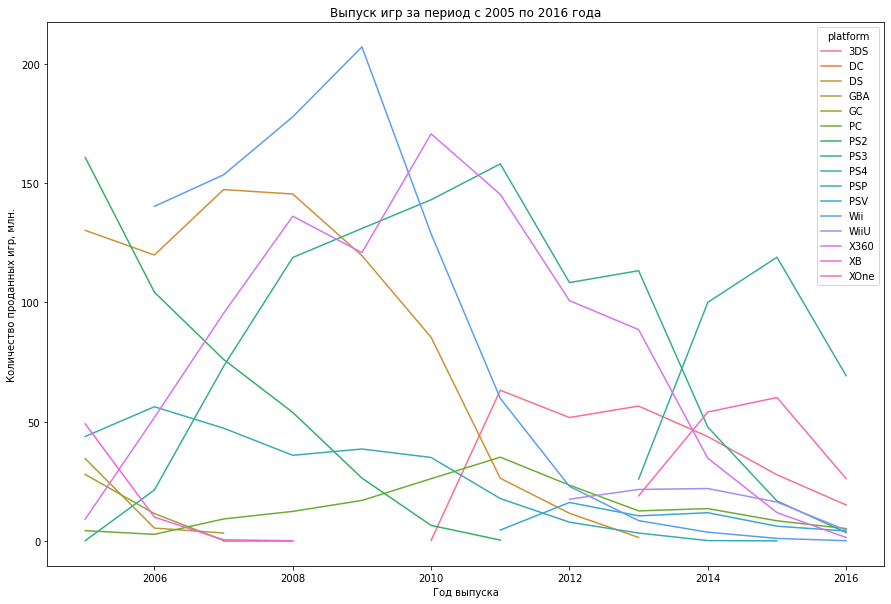

In [23]:
# создадим сводную таблицу с данными продаж по годам и лидирующим платформам за актуальный период
actual_year_pivot = pd.pivot_table(df, index=['platform', 'year_of_release'],
                                   values='all_sales', aggfunc='sum').sort_values(by='all_sales',
                                                                                  ascending=False)
actual_year_pivot = actual_year_pivot.sort_values(by='platform')
actual_year_pivot = actual_year_pivot.query('year_of_release >= 2005')

# добавил reset_index для сброса индексов сводной таблицы
actual_year_pivot = actual_year_pivot.reset_index(level=['platform', 'year_of_release'])

# по данной сводной таблице построим линейный график распределения продаж по годам
plt.figure(figsize=(15, 10))
#sns.set_theme(style='darkgrid')
sns.lineplot(data=actual_year_pivot, x='year_of_release',
             y='all_sales', hue='platform',
             markers=True, dashes=False).set(title='Выпуск игр за период с 2005 по 2016 года',
                                             xlabel='Год выпуска', ylabel='Количество проданных игр, млн.');

Построенный график еще раз подтвержает вывод о 10ти летнем сроке актуальности платформы.

На конец 2016 года мы видим 3 потенциально прибыльных платформы: **PlayStation 4, XBox One, Nintendo 3DS**. Последней уже будет седьмой год с момента выпуска, поэтому она будет наименее прибыльной из трех.

Для построения прогнозов на 2017 года необходимо руководствоваться данными с 2015 года, так мы отсеим неактуальные платформы.

### Диаграмма рассеивания по платформам

Построим диаграмму размаха по глобальным продажам потенциально прибыльных платформ.
Как мы выяснили ранее, такими плафтормами являются PlayStation 4, XBox One, Nintendo 3DS.
Возьмем ранее созданную сводную таблицу с актуальным периодом и отфильтруем значения, оставив только три вышеуказанные платформы.

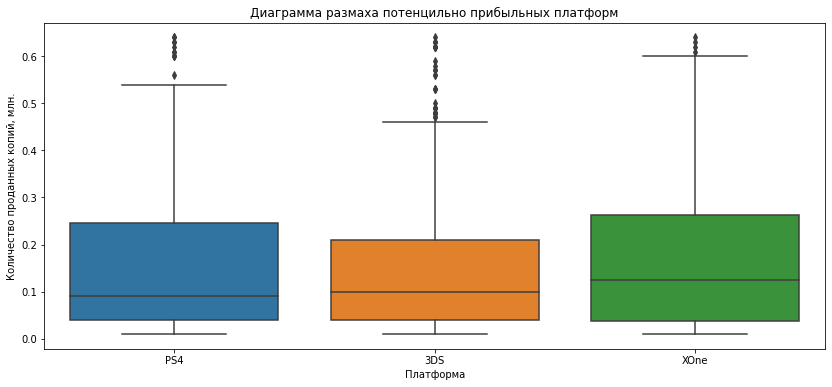

In [24]:
# отфильтруем исходную таблицу и оставим только 3 потенциально прибыльные платформы
potentional_df = df.query(('platform == "PS4" or platform == "XOne" or platform == "3DS"'))

# для ограничения выбросов на графике используем метод квантилей и создадим диапазон нормальных значений
top_q = potentional_df['all_sales'].quantile(0.75)
low_q = potentional_df['all_sales'].quantile(0.25)
range_q = top_q + 2*low_q

# построим диаграмму размаха на основании отфильтрованной таблицы, используя диапазон нормальных значений
plt.figure(figsize=(14, 6))
#sns.set_theme(style='darkgrid')
sns.boxplot(x='platform', y='all_sales',
            data=potentional_df.query('all_sales <= @range_q'
                                     )).set(title='Диаграмма размаха потенцильно прибыльных платформ',
                                                                    xlabel='Платформа',
                                                                    ylabel='Количество проданных копий, млн.');

Из построенной диаграммы видно следующее:
* общее распределение продаж и их медиана выше у XBox One;
* у Nintendo 3DS больше выбросов, "выстреливших" в продаже игр.

### Влияние отзывов на продажи XBox One

Рассмотрим, как влияют отзывы пользователей и критиков на продажи внутри популярной платформы. Для анализа возьмем XBox One.

Построим диаграмму рассеяния и рассмотрим корреляцию между ними.

In [25]:
# создадим общую функцию создания таблицы корреляции и отрисовкий диаграммы рассеяния
def platform_correlation(platform, title):
    """
    Функция на вход принимает два значения для расчета:
    platform - платформа по которой будет рассчитана корреляция и диаграмма рассеяния
    title - заголовок графика
    
    Из датафрейма фильтруются значения только заданной платформы.
    Выводится таблица корреляции между глобальными продажами платформы и оценками пользователей и критиков.
    Затем строятся два графика рассеяния - глобальных продаж по пользовательским оценкам
    и глобальные продажи по оценкам критиков. На графиках строится линия, указывающая направление корреляции.
    """
    plt.figure(figsize=(12, 5))
    sns.regplot(data=df[df.platform == platform], 
                x='all_sales', y='user_score', 
                line_kws={"color":"r","alpha":0.7,"lw":5}
               ).set(title=title, xlabel='Количество проданных копий, млн.',
                     ylabel='Пользовательская оценка');
    plt.figure(figsize=(12, 5))
    sns.regplot(data=df[df.platform == platform],
                x='all_sales', y='critic_score',
                line_kws={"color":"r","alpha":0.7,"lw":5}
               ).set(title=title, xlabel='Количество проданных копий, млн.',
                     ylabel='Оценка критиков');
    display(df[df.platform == platform][['all_sales', 'critic_score','user_score']].corr(
    ).style.background_gradient(cmap='Greens'))

,all_sales,critic_score,user_score
all_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


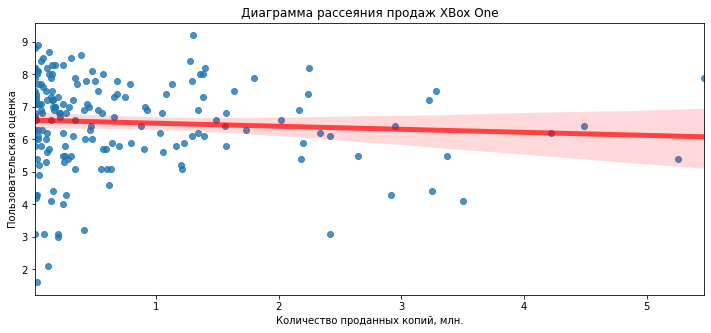

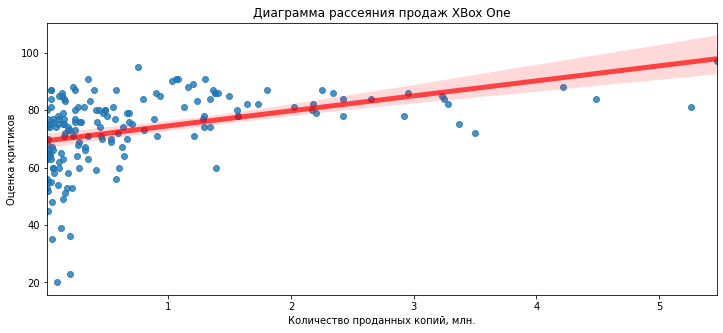

In [26]:
# с помощью функции platform_correlation выведем таблицу корреляции и построим диграммы рассеивания
# для XBox One
platform_correlation('XOne', 'Диаграмма рассеяния продаж XBox One')

По графикам рассеяния и таблице корреляции мы выяснили:
* между глобальными продажами и оценками критиков существует положительная корреляция 0.42, соответственно оценки критиков влияют на продажи;
* между глобальными продажаи и оценками пользователей корреляция практически отсутствует.

### Влияние отзывов на продажи PlayStation 4 и Nintendo 3DS

Также рассмотрим, как влияют отзывы пользователей и критиков на продажи внутри двух других перспективных платформ. Для них построим диаграммы рассеяния и рассмотрим корреляцию между ними.

#### PlayStation 4

,all_sales,critic_score,user_score
all_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


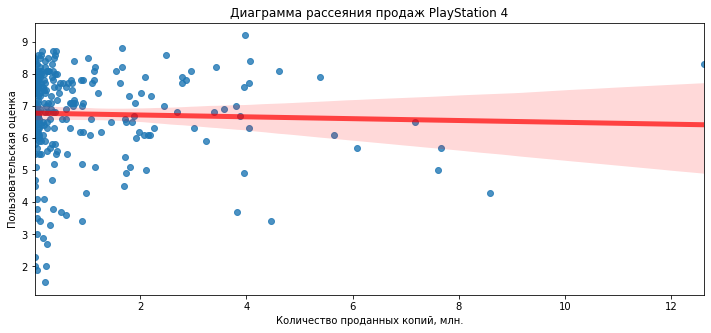

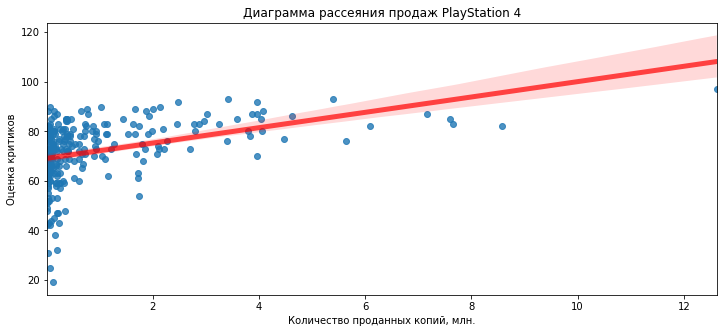

In [27]:
# с помощью функции platform_correlation выведем таблицу корреляции и построим диграммы рассеивания
# для Playstation 4
platform_correlation('PS4', 'Диаграмма рассеяния продаж PlayStation 4')

По графикам рассеяния и таблице корреляции мы выяснили:
* между глобальными продажами и оценками критиков существует положительная корреляция 0.41, соответственно оценки критиков влияют на продажи;
* между глобальными продажаи и оценками пользователей корреляция практически отсутствует.

#### Nintendo 3DS

,all_sales,critic_score,user_score
all_sales,1.000000,0.349401,0.224808
critic_score,0.349401,1.000000,0.744168
user_score,0.224808,0.744168,1.000000


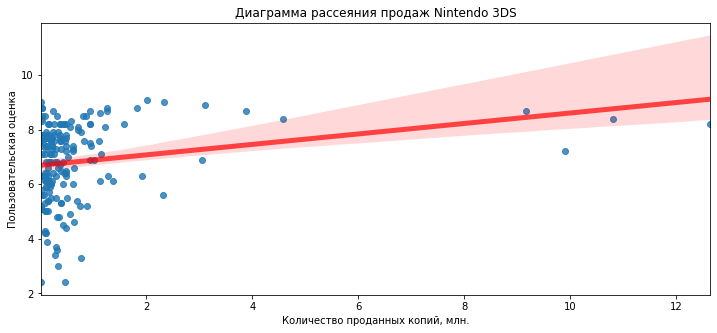

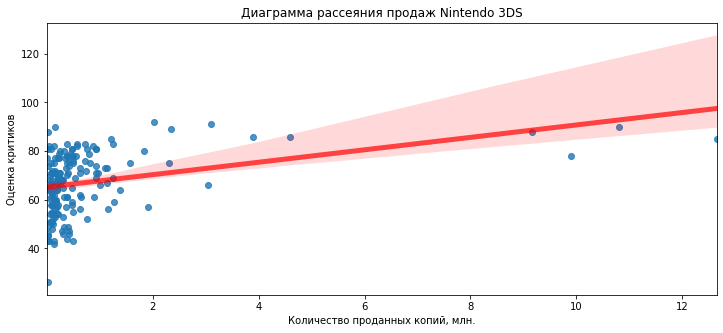

In [28]:
# с помощью функции platform_correlation выведем таблицу корреляции и построим диграммы рассеивания
# для Nintendo 3DS
platform_correlation('3DS', 'Диаграмма рассеяния продаж Nintendo 3DS')

По графикам рассеяния и таблице корреляции мы выяснили:
* между глобальными продажами и оценками критиков существует положительная корреляция 0.35, соответственно оценки критиков влияют на продажи;
* между глобальными продажаи и оценками пользователей существует положительная корреляция 0.23, соответственно оценки пользователей влияют на продажи;

### Вывод по влиянию отзывов на глобальные продажи

Исследовали влияние отзывов пользователей и критиков на глобальные продажи игр по перспективным платформам PlayStation 4, XBox One и Nintendo 3DS. По полученным данным можно сказать следующее.
* **оценки критиков влияют на продажи игр** почти одинаково у PlayStation 4 и XBox One (корреляция 0.42), меньше у Nintendo 3DS (0.35);
* **оценки пользователей не влияют на продажи игр PlayStation 4 и XBox One**;
* **оценки пользователей влияют на продажи игр Nintendo 3DS** (корреляция 0.22). Вероятно это связано с популярностью платформы в Японии, откуда она родом. Видимо пользователи этого региона серьезнее относятся к оценками других пользователей.

### Распределение игр по жанрам

Рассмотрим распределение игр по жанрам, а также глобальных продаж по ним. Для этого создадим сводную таблицу.

In [29]:
# предварительно отсортируем датафрейм по актуальному временному диапазону, начиная с 2015 года
# соберем сводную таблицу жанров посчитав общее количество выпущенных игр и глобальные продажи по ним
# затем выведем эту таблицу на экран
genre_pivot = df[df['year_of_release'] >= 2015].pivot_table(index='genre', values='all_sales', aggfunc=['mean', 'count'])
genre_pivot.columns = ('genre_mean', 'genre_count')
genre_pivot = genre_pivot.sort_values(by='genre_mean', ascending=False)
genre_pivot.style.bar()

,genre_mean,genre_count
genre,,
Shooter,1.305309,81
Sports,0.601215,107
Role-Playing,0.422879,132
Fighting,0.334324,37
Platform,0.331429,28
Racing,0.258571,42
Action,0.236961,431
Simulation,0.228788,33
Misc,0.199577,71


Из полученных данных видно следующее:

* жанры, приносящие стабильный высокий доход это **шутер, спорт и РПГ**
* больше всго игр, тем не менее, выпускается в жанре **экшн**

### Вывод по исследовательскому анализу

Проведя исследовательский анализ данных, мы выяснили следующее:

* для построения прогнозов на 2017 год, необходимы данные с 2015 года;
* лидерами по глобальным продажам являются PlayStation 2, XBox 360, Nintendo Wii, PlayStation 3, Nintendo DS и PlayStation One;
*	срок "жизни" платформы составляет примерно 10 лет, ее популярность приходит через 3-5 лет после выпуска;
* на конец 2016 года 3 потенциально прибыльных платформы: PlayStation 4, XBox One, Nintendo 3DS. Но актуальность Nintendo 3DS идет на спад;
* на продажи всех три потенциально прибыльных платформ влияют отзывы критиков;
* на продажи Nintendo 3DS также влияют отзывы пользователей;
* жанры, приносящие стабильный высокий доход это шутер, спорт и РПГ;
* больше всго игр, выпускается в жанре экшн.

## Портрет пользователя по регионам

Составим портрет для пользователей из разных регионов: Северной Америки (NA), Европы (EU) и Японии (JP). Проанализируем топ-5 платформ и жанров для пользователей разных регионов. Проверим влияние возрастного рейтинга ESRB на продажи в отдельных регионах. 

Портрет будем строить на основании данных с 2015 по 2016 год.

### Топ-5 платформ по регионам

Сначала изучим предпочтения платформ пользователей из разных регионов

In [30]:
# создадим общую функцию создания сводной таблицы и отрисовкий круговой диаграммы по ней
def pie_chart(index, sales, title):
    """
    Функция на вход принимает три значения для расчета:
    index - платформа, жанр или возрастной рейтинг
    sales - регион продаж - Америка, Европа, Япония
    title - заголовок графика
    Расчеты функции ограничены данными с 2015 года для актуальности.
    
    Собирается сводная таблица из полученных данных, суммируются продажи в регионе,
    сортируются по убыванию и фильтруются топ-5 позиций.
    По сводной таблице рисуется круговая диаграмма по значениям суммарных продаж и индексам из
    сводной таблицы. Значения долей округлены до сотых.
    """
    df_range = df[df['year_of_release'] >= 2015]
    region_pivot = df_range.pivot_table(index=index, values=sales, aggfunc='sum')
    region_pivot = region_pivot.sort_values(by=sales, ascending=False).head()
    plt.figure(figsize=(20,7))
    plt.pie(x=region_pivot[sales], labels=region_pivot.index, autopct="%.2f")
    plt.title(title);

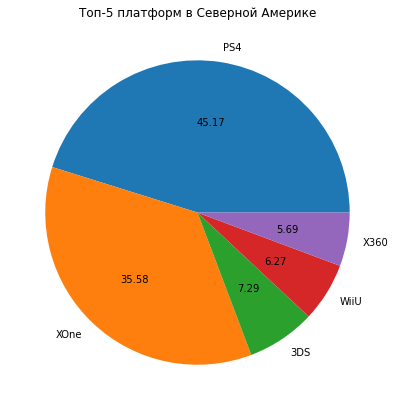

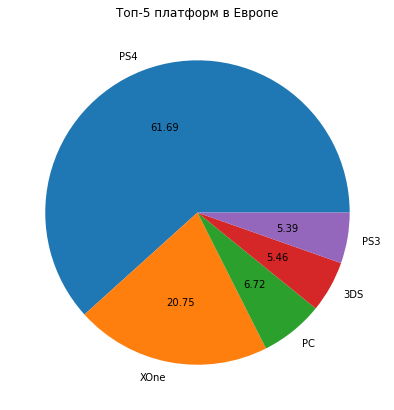

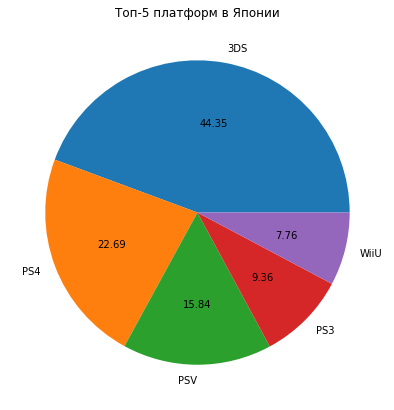

In [31]:
# с помощью функции pie_chart нарисуем диаграммы топ-5 платформ в регионах
pie_chart('platform', 'na_sales', 'Топ-5 платформ в Северной Америке')
pie_chart('platform', 'eu_sales', 'Топ-5 платформ в Европе')
pie_chart('platform', 'jp_sales', 'Топ-5 платформ в Японии')

В зависимости от региона мы увидели следующие предпочтения за 2015-2016 года:
* в Северной Америке 45% всех продаж пришлось на Playstation 4, далее идет ближайший конкурент XBox One с 36%, затем две консоли от Нинтендо, занимая 14% и на последнем месте XBox 360 с 6% продаж.
* в Европе  - Playstation более популярна и занимает 62% рынка, консоль от Майкрософт сильно уступает с 20%. ПК гейминг в Европе более популярен, чем в Америке с 7% продаж. Последние два места занимают Японские консоли 3DS и WiiU имея по 5% рынка.
* Топ-5 Японии сильно отличается от предыдущих регионов. В этот топ попали только "местные" консоли. Nintendo 3DS 44%, Playstation 4 23%, портативная PS Vita 16%, Playstation 3 9% и Nintendo WiiU 8%. Видна любовь японцев к портативным консолям. И нелюбовь к ПК.

### Топ-5 жанров по регионам

Теперь изучим жанровые предпочтения пользователей разных регионов.

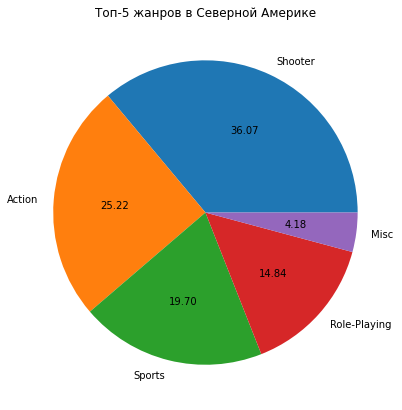

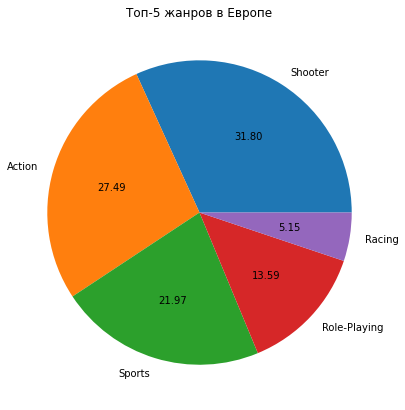

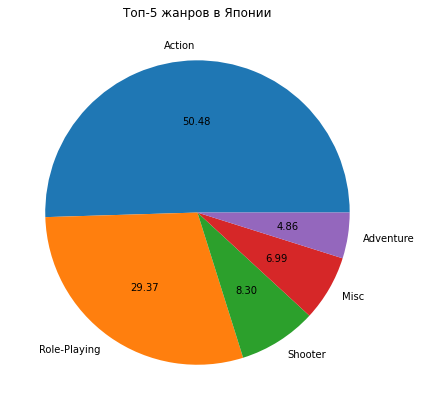

In [32]:
# с помощью функции pie_chart нарисуем диаграммы топ-5 жанров в регионах
pie_chart('genre', 'na_sales', 'Топ-5 жанров в Северной Америке')
pie_chart('genre', 'eu_sales', 'Топ-5 жанров в Европе')
pie_chart('genre', 'jp_sales', 'Топ-5 жанров в Японии')

Проанализировав полученныек диагрыммы, мы видим:
* жанровые предпочтения Северной Америки и Европы почти схожи, доли жанров отличаются на +/- 5%, за исключением того, что пятое место в Америке занимают гонки, в Европе игры под жанром "разное";
* Япония, как и в случае с платформами, полностью отличается от других регионов. Первое место заняли экшены, второе РПГ, затем расположились шутеры, "разное" и адвенчуры.

### Возрастной рейтинг по регионам

Далее рассмотрим доли продаж по разным категориям возрастного рейтинга ESRB в разных регионах. Буквенный код рейтинга означает:
* M / Mature, возраст 17+
* T / Teen, возраст 13+
* E10 / Everyone 10, возраст 10+
* E / Everyone, возраст 0+
* no_rating игры, неподвергавшиеся оценкой ESRB

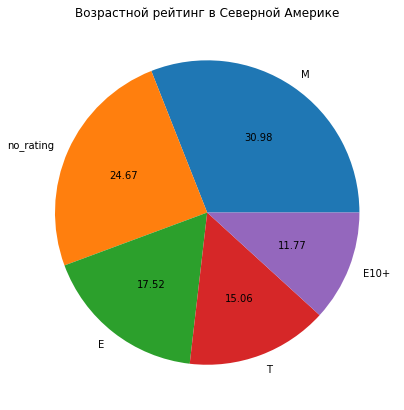

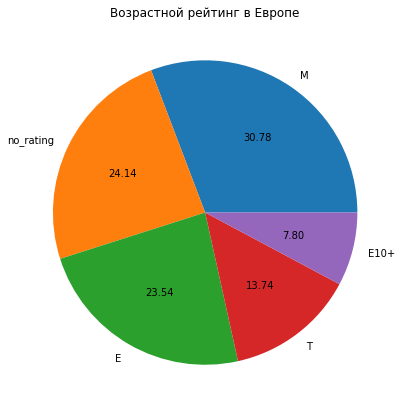

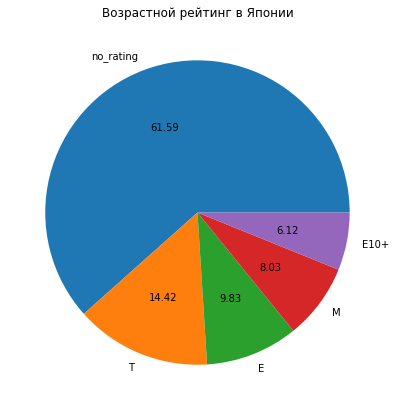

In [33]:
# с помощью функции pie_chart нарисуем диаграммы продаж разных возрастных категорий в регионах
pie_chart('rating', 'na_sales', 'Возрастной рейтинг в Северной Америке')
pie_chart('rating', 'eu_sales', 'Возрастной рейтинг в Европе')
pie_chart('rating', 'jp_sales', 'Возрастной рейтинг в Японии')

Доли продаж по возрастному рейтингу в разных регионах расположились следующим образом:
* в Америке лидируют игры 17+ с 31%, затем "без рейтинга" 25%, третье место 0+ 17,5%, на четвертом 13+ 15% и на пятом 10+ 12%;
* в Европе также лидируют игры 17+ 31%, второе место занимает без рейтинга 24%, третье 0+ 24%, четвертое 13+ 14% и на последнем 10+ с 8%;
* в Японии самые популярные игры без рейтинга 62%, на втором месте 13+ 14%, на третьем 0+ 10%, на четвертом 17+, на пятом 10+ с 6%.

### Вывод 

Построили портрет пользователя из разных регионов: Северной Америки (NA), Европы (EU) и Японии (JP). И вот, что получилось:
* пользователь из Северной Америки похож на пользователя из Европы: играют на PS4 в шутеры 17+;
* пользователь из Японии играет на Nintendo 3DS в экшн без рейтинга.

## Проверка гипотез

Завершающим этапом изучения таблицы являет принятие или опровержение двух гипотез:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Далее рассмотрим эти гипотезы более подробно.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC

Преждем чем приступать к выдвижению гипотез необходимо сравнить выборки средних пользовательских оценок на Xbox One и PC,  сравнить дисперсии и предварительно оценить средние значения.

In [34]:
# создадим сводную таблицу по пользовательским оценкам, расчитаем их среднее и дисперсию
# для PC и XBox One и выведем эти значения на экран
userscore_platform = df.pivot_table(index='platform', values='user_score', aggfunc={'mean', 'var'})
userscore_platform = userscore_platform.query('platform == "XOne" or platform == "PC"')
userscore_platform

,mean,var
platform,,
PC,7.062468,2.340787
XOne,6.521429,1.906997


Теперь составим нулевую `H0` и альтернативную `H1` гипотезы:
* `H0` - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* `H1` - средние пользовательские рейтинги платформ Xbox One и PC отличаются

С помощью теста Стьюдента проверим гипотезы. Уровень статистической значимости alpha 0.05, дисперсии выборок различаются.

In [35]:
# выделим две выборки со средними пользовательскими оценками по Xbox One и PC
# и очистим эти выборки от пропусков
userscore_xone = df[df['platform'] == 'XOne']['user_score'].dropna()
userscore_pc = df[df['platform'] == 'PC']['user_score'].dropna()

# проведем тест Стьюдента по выборкам
alpha = .05
results_platform = st.ttest_ind(
    userscore_xone, 
    userscore_pc,
    equal_var = False)

print('p-значение:', results_platform.pvalue)

if (results_platform.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC отличаются")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые") 

p-значение: 4.935072360183565e-06
Средние пользовательские рейтинги платформ Xbox One и PC отличаются


Предварительное сравнение средних значений выборок и проведение t-теста Стьюдента дало основание предпологать, что **средние пользовательские рейтинги платформ Xbox One и PC отличаются**

### Средние пользовательские рейтинги жанров Action и Sports

Таким же образом, как в предыдущем пункте, сравним выборки средних пользовательских оценок жанров экшн и спорт, сравним дисперсии и предварительно оценим средние значения.

In [36]:
# создадим сводную таблицу по пользовательским оценкам, расчитаем их среднее и дисперсию
# для жанров спорт и экшн и выведем эти значения на экран
userscore_genre = df.pivot_table(index='genre', values='user_score', aggfunc={'mean', 'var'})
userscore_genre = userscore_genre.query('genre == "Action" or genre == "Sports"')
userscore_genre

,mean,var
genre,,
Action,7.054044,2.031747
Sports,6.961197,2.596515


Cоставим нулевую `H0` и альтернативную `H1` гипотезы:
* `H0` - средние пользовательские рейтинги жанров Action и Sports одинаковые
* `H1` - средние пользовательские рейтинги жанров Action и Sports отличаются

С помощью теста Стьюдента проверим гипотезы. Уровень статистической значимости alpha 0.05, значения дисперсии выборок близки, примем их одинаковыми.

In [37]:
# выделим две выборки со средними пользовательскими оценками по жанрам экшн и спорт
# и очистим эти выборки от пропусков
userscore_action = df[df['genre'] == 'Action']['user_score'].dropna()
userscore_sports = df[df['genre'] == 'Sports']['user_score'].dropna()

# проведем тест Стьюдента по выборкам
alpha = .05
results_genre = st.ttest_ind(
    userscore_action, 
    userscore_sports,
    equal_var = True)

print('p-значение:', results_genre.pvalue)

if (results_genre.pvalue < alpha):
    print("Cредние пользовательские рейтинги жанров Action и Sports отличаются")
else:
    print("Cредние пользовательские рейтинги жанров Action и Sports одинаковые") 

p-значение: 0.10406951359049141
Cредние пользовательские рейтинги жанров Action и Sports одинаковые


Предварительное сравнение средних значений выборок и проведение t-теста Стьюдента ~~показало~~ дало основание полагать, что **средние пользовательские рейтинги жанров Action и Sports одинаковые**

## Общий вывод

Проведя данное исследование, мы проанализириволи и подготовили данные о продажах интернет магазина игр различных жанров и платформ. 
На основании этих данных провели исследовательский анализ, составили портрет пользователя разных регионов и проверили гипотезы средних пользовательских оценок.

* платформы-лидеры продаж за все время: PlayStation 2, XBox 360, Nintendo Wii, PlayStation 3, Nintendo DS и PlayStation One;
* срок "жизни" платформы составляет примерно 10 лет, ее популярность приходит через 3-5 лет после выпуска;
* перспективно прибыльные платформы на 2017 год: PlayStation 4, XBox One, Nintendo 3DS;
* на продажи влияют отзывы критиков;
* наиболее стабильно прибыльные жанры это шутер, спорт и РПГ;
* перспективно прибыльный пользователь играет на PS4 в шутеры 17+;
* можно предпологать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются, а рейтинги жанров Action и Sports одинаковые.
